In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('result.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 第一部分：数据聚合与运算
## 2.6 数据运用
### 2.6.1 任务一：通过《Python for Data Analysis》P303、Google or Baidu来学习了解GroupBy机制
类似于数据库的分组操作，同样的，我们可以在pandas里面将我们想要的数据表按一定的规则分割，并获得我们想要的数据，最后再进行整合，这里大概就是group by的意义

### 2.4.2：任务二：计算泰坦尼克号男性与女性的平均票价

In [14]:
grouped = df['Fare'].groupby(df['Sex'])
mean = grouped.mean()
mean

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

### 2.4.3：任务三：统计泰坦尼克号中男女的存活人数

In [15]:
grouped = df['Survived'].groupby(df['Sex'])
survied = grouped.sum()
survied

Sex
female    233
male      109
Name: Survived, dtype: int64

### 2.4.4：任务四：计算客舱不同等级的存活人数

In [4]:
grade_survived = df['Survived'].groupby(df['Pclass'])
grade_survived.sum() #因为存活的标志是 0 和 1所以求和即可得到答案

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

男性们出行更不容易讲究高级客舱，同时在泰坦尼克号沉船事件中可以看出男人们为了保护广大女性，牺牲了很多，男人是多麽的不容易 qwq ε=(´ο｀*)))唉

In [5]:
data = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
data

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [6]:
data.agg(['sum', 'min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [7]:
data.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
max,NaN,8.0
min,1.0,2.0
sum,12.0,NaN


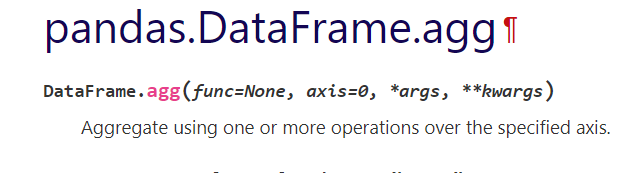
在指定的一个或多个轴上进行聚合操作

### 2.4.5：任务五：统计在不同等级的票中的不同年龄的船票花费的平均值

In [12]:
df.groupby(['Pclass','Age'])['Fare'].mean()

Pclass  Age  
1       0.92     151.550000
        2.00     151.550000
        4.00      81.858300
        11.00    120.000000
        14.00    120.000000
        15.00    211.337500
        16.00     61.293067
        17.00     92.261100
        18.00    169.612500
        19.00     92.692500
        21.00    139.206933
        22.00     91.656660
        23.00    146.544433
        24.00    122.997614
        25.00     99.356967
        26.00     54.425000
        27.00     92.957300
        28.00     47.830200
        29.00    102.645833
        30.00     67.017367
        31.00     87.527500
        32.00     53.395850
        33.00     58.650000
        34.00     26.550000
        35.00    165.744911
        36.00    125.623611
        37.00     45.118067
        38.00    103.711800
        39.00     65.918320
        40.00     69.336660
                    ...    
3       31.00     11.216071
        32.00     17.335758
        33.00     10.844787
        34.00      9.248950
      

### 2.4.6：任务六：将任务二和任务三的数据合并，并保存到sex_fare_survived.csv

In [28]:
res = pd.merge(mean.to_frame(),survied.to_frame(),on='Sex')
res

,Fare,Survived
Sex,,
female,44.479818,233
male,25.523893,109


### 2.4.7：任务七：得出不同年龄的总的存活人数，然后找出存活人数最多的年龄段，最后计算存活人数最高的存活率（存活人数/总人数）

In [34]:
survived_by_age = df.groupby('Age')['Survived'].sum()
survived_by_age

Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      5
2.00      3
3.00      5
4.00      7
5.00      4
6.00      2
7.00      1
8.00      2
9.00      2
10.00     0
11.00     1
12.00     1
13.00     2
14.00     3
14.50     0
15.00     4
16.00     6
17.00     6
18.00     9
19.00     9
20.00     3
20.50     0
21.00     5
22.00    11
23.00     5
         ..
44.00     3
45.00     5
45.50     0
46.00     0
47.00     1
48.00     6
49.00     4
50.00     5
51.00     2
52.00     3
53.00     1
54.00     3
55.00     1
55.50     0
56.00     2
57.00     0
58.00     3
59.00     0
60.00     2
61.00     0
62.00     2
63.00     2
64.00     0
65.00     0
66.00     0
70.00     0
70.50     0
71.00     0
74.00     0
80.00     1
Name: Survived, Length: 88, dtype: int64

In [36]:
survived_by_age[survived_by_age.values == survived_by_age.max()]

Age
24.0    15
Name: Survived, dtype: int64

In [37]:
sur_sum = df['Survived'].sum()
per = survived_by_age.max() / sur_sum
print('最大存活率为：',per)

最大存活率为： 0.043859649122807015
